# IoT Cyber Attack Detection Using Machine Learning

## Section 1: Data Preparation and Feature Engineering

### 1.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

### 1.2 Load Dataset

In [ ]:
benign = pd.read_csv('BenignTraffic.pcap.csv')
benign['Label'] = 'Benign'

ddos = pd.read_csv('DDoS-UDP_Flood.pcap.csv')
ddos['Label'] = 'DDoS'

injection = pd.read_csv('CommandInjection.pcap.csv')
injection['Label'] = 'Injection'

recon = pd.read_csv('Recon-PortScan.pcap.csv')
recon['Label'] = 'Recon'

In [ ]:
benign.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,32.0,6,198.4,430.273287,0.0,0.0,0.0,0.0,1.0,0.0,...,5004,66,2962,500.4,977.325512,500.4,0.002324,10,9.551652e+05,Benign
1,22.4,6,114.4,484.616113,0.0,0.0,0.0,0.2,0.6,0.0,...,1404,60,583,140.4,174.827026,140.4,0.002179,10,3.056449e+04,Benign
2,27.2,6,62.5,398.610950,0.0,0.0,0.0,0.0,0.8,0.0,...,10784,60,1514,1078.4,701.384536,1078.4,0.003173,10,4.919403e+05,Benign
3,23.2,6,62.1,425.187438,0.0,0.1,0.0,0.0,0.6,0.0,...,7884,60,2962,788.4,1025.156812,788.4,0.002507,10,1.050946e+06,Benign
4,32.0,6,64.0,1563.521956,0.0,0.0,0.0,0.1,1.0,0.0,...,13782,156,1514,1378.2,429.437306,1378.2,0.000660,10,1.844164e+05,Benign


In [ ]:
ddos.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,8.0,17,64.0,38311.143588,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.0,60.0,0.000026,100,0.0,DDoS
1,8.0,17,64.0,17215.169923,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.0,60.0,0.000058,100,0.0,DDoS
2,8.0,17,64.0,39553.979630,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.0,60.0,0.000025,100,0.0,DDoS
3,8.0,17,64.0,34025.342744,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.0,60.0,0.000029,100,0.0,DDoS
4,8.0,17,64.0,85843.307409,0.0,0.0,0.0,0.0,0.0,0.0,...,6000,60,60,60.0,0.0,60.0,0.000012,100,0.0,DDoS


In [ ]:
injection.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.6,6,68.4,13.173942,0.1,0.1,0.0,0.0,0.6,0.0,...,656,60,78,65.6,6.239658,65.6,0.075907,10,38.933333,Injection
1,14.4,17,81.1,19.077340,0.0,0.0,0.0,0.1,0.3,0.0,...,1055,60,218,105.5,65.396653,105.5,0.056936,10,4276.722222,Injection
2,14.4,17,115.2,23.399642,0.0,0.0,0.0,0.1,0.3,0.0,...,1145,60,230,114.5,63.772599,114.5,0.043896,10,4066.944444,Injection
3,28.8,6,161.4,122.520455,0.0,0.2,0.0,0.3,0.7,0.0,...,1597,66,529,159.7,146.576525,159.7,0.008362,10,21484.677778,Injection
4,16.0,6,95.4,51.143063,0.0,0.0,0.0,0.2,0.4,0.0,...,1728,60,385,172.8,100.906778,172.8,0.019553,10,10182.177778,Injection


In [ ]:
recon.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,28.8,6,64.0,741.291953,0.0,0.0,0.0,0.0,0.9,0.0,...,13512,66,1494,1351.2,451.573250,1351.2,0.001349,10,203918.400000,Recon
1,29.6,6,56.8,91.820470,0.0,0.0,0.0,0.2,0.9,0.0,...,4797,66,1494,479.7,644.811437,479.7,0.010915,10,415781.788889,Recon
2,30.4,6,59.2,148.169878,0.0,0.1,0.0,0.1,0.8,0.0,...,901,66,288,90.1,69.650636,90.1,0.007071,10,4851.211111,Recon
3,24.0,6,84.4,103.391254,0.1,0.1,0.0,0.4,0.7,0.0,...,1537,60,667,153.7,187.234286,153.7,0.009672,10,35056.677778,Recon
4,27.2,6,77.0,92.181290,0.1,0.0,0.0,0.2,0.8,0.0,...,1195,66,307,119.5,87.029050,119.5,0.012123,10,7574.055556,Recon


In [ ]:
# combine all 4 dataframes into 1
df = pd.concat([benign, ddos, injection, recon], ignore_index=True)
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,32.0,6,198.4,430.273287,0.0,0.0,0.0,0.0,1.0,0.0,...,5004,66,2962,500.4,977.325512,500.4,0.002324,10,9.551652e+05,Benign
1,22.4,6,114.4,484.616113,0.0,0.0,0.0,0.2,0.6,0.0,...,1404,60,583,140.4,174.827026,140.4,0.002179,10,3.056449e+04,Benign
2,27.2,6,62.5,398.610950,0.0,0.0,0.0,0.0,0.8,0.0,...,10784,60,1514,1078.4,701.384536,1078.4,0.003173,10,4.919403e+05,Benign
3,23.2,6,62.1,425.187438,0.0,0.1,0.0,0.0,0.6,0.0,...,7884,60,2962,788.4,1025.156812,788.4,0.002507,10,1.050946e+06,Benign
4,32.0,6,64.0,1563.521956,0.0,0.0,0.0,0.1,1.0,0.0,...,13782,156,1514,1378.2,429.437306,1378.2,0.000660,10,1.844164e+05,Benign


### 1.3 Data Cleaning and Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [ ]:
# fill missing values in 'Std' and 'Variance' with their respective medians
df['Std'].fillna(df['Std'].median(), inplace=True)
df['Variance'].fillna(df['Variance'].median(), inplace=True)

df.isnull().sum()

<ipython-input-20-40b845c47c7a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Std'].fillna(df['Std'].median(), inplace=True)
<ipython-input-20-40b845c47c7a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


### 1.4 Feature Engineering & Normalization


In [ ]:
# drop non numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

print("Non-numeric columns:", non_numeric_cols) # the output indicates no non-numeric columns

Non-numeric columns: Index(['Label'], dtype='object')


In [ ]:
# encode target labels
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Benign': np.int64(0), 'DDoS': np.int64(1), 'Injection': np.int64(2), 'Recon': np.int64(3)}


In [ ]:
# normalize features using StandardScaler.
X = df.drop('Label', axis=1)
y = df['Label']

X.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace infinite and -infinite with NaN
X.dropna(inplace=True) # drop them
y = y[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean:", X_scaled.mean(axis=0))  # Should be ~0
print("Std:", X_scaled.std(axis=0))    # Should be ~1

In [ ]:
# dimension reduction using pca
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)


### 1.5 Handling Class Imbalance

In [ ]:
# check the class distribution before applying SMOTE
print(f"Original class distribution:\n{y.value_counts()}")

Original class distribution:
Label
0    362342
1    266601
3     82283
2      5409
Name: count, dtype: int64


In [ ]:
# apply SMOTE to the Z-score normalized data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_zscore, y)

# check the new class distribution
print(f"Balanced class distribution:\n{pd.Series(y_balanced).value_counts()}")

Balanced class distribution:
Label
0    362342
1    362342
2    362342
3    362342
Name: count, dtype: int64


## Section 2: Machine Learning Modeling and Evaluation

### 2.1 Train-Test Split

In [ ]:
# Split balanced data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

### 2.2 Train Traditional Classifiers

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
# linear SVM
svm_model = LinearSVC(random_state=42, max_iter=10000)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:28:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 2.3 Train Neural Network (MLP or CNN)

In [ ]:
# One-hot encode labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the model
mlp_model = Sequential()
mlp_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = mlp_model.fit(X_train, y_train_encoded, epochs=15, batch_size=128, validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.7585 - loss: 0.5456 - val_accuracy: 0.8115 - val_loss: 0.4269
Epoch 2/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8027 - loss: 0.4471 - val_accuracy: 0.8184 - val_loss: 0.4104
Epoch 3/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8097 - loss: 0.4323 - val_accuracy: 0.8246 - val_loss: 0.3971
Epoch 4/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8136 - loss: 0.4223 - val_accuracy: 0.8309 - val_loss: 0.3880
Epoch 5/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8174 - loss: 0.4137 - val_accuracy: 0.8334 - val_loss: 0.3811
Epoch 6/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8195 - loss: 0.4093 - val_accuracy: 0.8356 - val_loss: 0.3754
Epoch 7/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8218 - loss: 0.4065 - val_accuracy: 0.8372 - val_loss: 0.3739
Epoch 8/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8250 - loss: 0

In [ ]:
# Reshape for CNN input: [samples, time_steps, features]
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# One-hot encode again (already done for MLP but just in case)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
cnn_history = cnn_model.fit(X_train_cnn, y_train_encoded, epochs=15, batch_size=128, validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.6373 - loss: 0.8013 - val_accuracy: 0.7188 - val_loss: 0.6134
Epoch 2/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7065 - loss: 0.6281 - val_accuracy: 0.7253 - val_loss: 0.5851
Epoch 3/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.7157 - loss: 0.6052 - val_accuracy: 0.7329 - val_loss: 0.5719
Epoch 4/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.7201 - loss: 0.5944 - val_accuracy: 0.7352 - val_loss: 0.5671
Epoch 5/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.7250 - loss: 0.5871 - val_accuracy: 0.7370 - val_loss: 0.5601
Epoch 6/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.7262 - loss: 0.5840 - val_accuracy: 0.7428 - val_loss: 0.5533
Epoch 7/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.7286 - loss: 0.5796 - val_accuracy: 0.7398 - val_loss: 0.5559
Epoch 8/15
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 0.7300 - loss: 0

### 2.4 Evaluation Metrics


 Evaluation - Random Forest
              precision    recall  f1-score   support

           0       0.90      0.93      0.92    108703
           1       1.00      1.00      1.00    108702
           2       0.97      1.00      0.98    108703
           3       0.94      0.88      0.91    108703

    accuracy                           0.95    434811
   macro avg       0.95      0.95      0.95    434811
weighted avg       0.95      0.95      0.95    434811



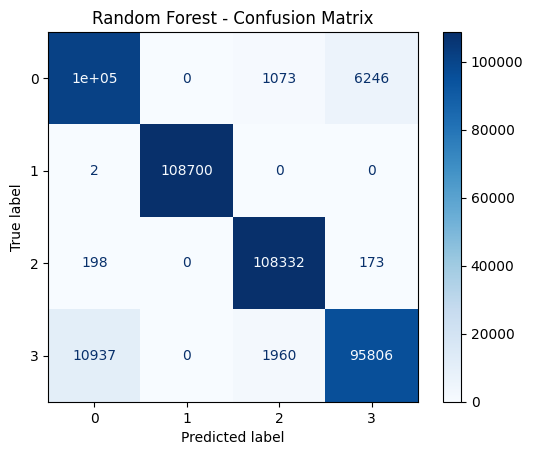

In [ ]:
# Random Forest Evaluation
class_names = np.unique(y_test).astype(str)
print("\n Evaluation - Random Forest")
print(classification_report(y_test, rf_pred, target_names=class_names))

cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65    108703
           1       1.00      1.00      1.00    108702
           2       0.67      0.74      0.71    108703
           3       0.75      0.62      0.68    108703

    accuracy                           0.76    434811
   macro avg       0.76      0.76      0.76    434811
weighted avg       0.76      0.76      0.76    434811



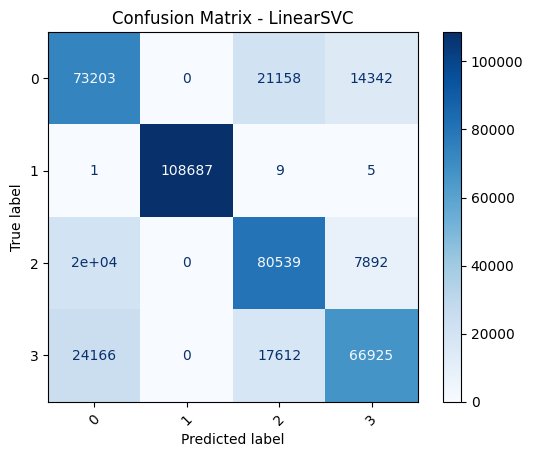

In [ ]:
# Print classification report
print("Classification Report for LinearSVC:")
print(classification_report(y_test, svm_pred))

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - LinearSVC")
plt.show()


 Evaluation - XGBoost
              precision    recall  f1-score   support

           0       0.84      0.94      0.89    108703
           1       1.00      1.00      1.00    108702
           2       0.92      0.96      0.94    108703
           3       0.92      0.77      0.84    108703

    accuracy                           0.92    434811
   macro avg       0.92      0.92      0.92    434811
weighted avg       0.92      0.92      0.92    434811



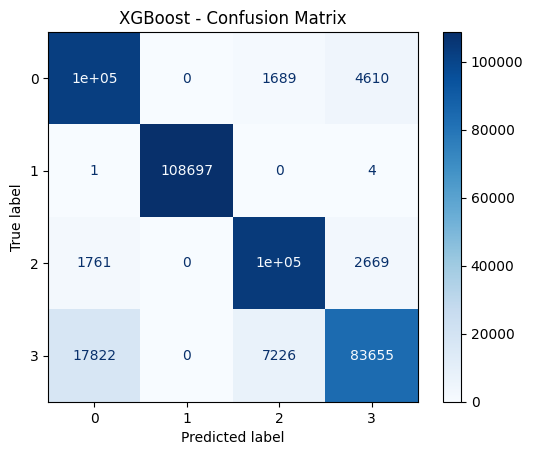

In [ ]:
# XGBoost Evaluation
print("\n Evaluation - XGBoost")
print(classification_report(y_test, xgb_pred, target_names=class_names))

cm_xgb = confusion_matrix(y_test, xgb_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=class_names)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.show()


 Evaluation - MLP Neural Network
13588/13588 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step
              precision    recall  f1-score   support

           0       0.70      0.83      0.76    108703
           1       1.00      1.00      1.00    108702
           2       0.86      0.90      0.88    108703
           3       0.85      0.64      0.73    108703

    accuracy                           0.84    434811
   macro avg       0.85      0.84      0.84    434811
weighted avg       0.85      0.84      0.84    434811



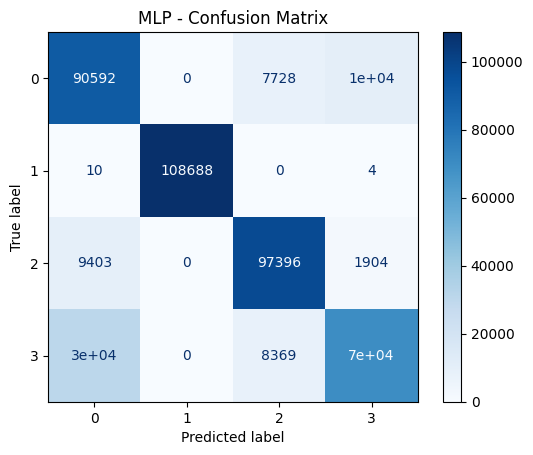

In [ ]:
# MLP Evaluation
print("\n Evaluation - MLP Neural Network")
mlp_pred_probs = mlp_model.predict(X_test)
mlp_pred = np.argmax(mlp_pred_probs, axis=1)

print(classification_report(y_test, mlp_pred, target_names=class_names))

cm_mlp = confusion_matrix(y_test, mlp_pred)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=class_names)
disp_mlp.plot(cmap="Blues")
plt.title("MLP - Confusion Matrix")
plt.show()


 Evaluation - CNN Neural Network
13588/13588 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step
              precision    recall  f1-score   support

           0       0.67      0.60      0.63    108703
           1       1.00      1.00      1.00    108702
           2       0.62      0.85      0.72    108703
           3       0.75      0.56      0.64    108703

    accuracy                           0.75    434811
   macro avg       0.76      0.75      0.75    434811
weighted avg       0.76      0.75      0.75    434811



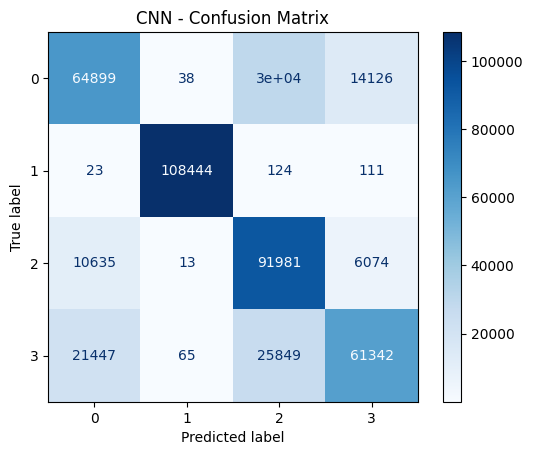

In [ ]:
# CNN Evaluation
print("\n Evaluation - CNN Neural Network")

# Predict
cnn_pred_probs = cnn_model.predict(X_test_cnn)
cnn_pred = np.argmax(cnn_pred_probs, axis=1)

# Classification report
print(classification_report(y_test, cnn_pred, target_names=class_names))

# Confusion matrix
cm_cnn = confusion_matrix(y_test, cnn_pred)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=class_names)
disp_cnn.plot(cmap="Blues")
plt.title("CNN - Confusion Matrix")
plt.show()